In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

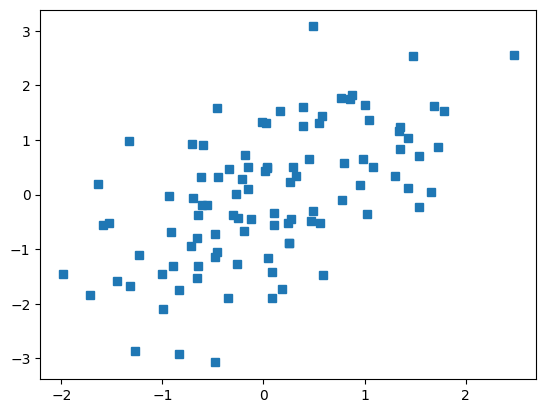

In [3]:
N=100
x=torch.randn(N,1)
y=x+torch.randn(N,1)
plt.plot(x,y,'s')
plt.show()

In [4]:
ANNreg=nn.Sequential(nn.Linear(1,1),
                    nn.ReLU(),
                    nn.Linear(1,1))


In [5]:
learningRate=0.05
lossfun=nn.MSELoss()
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [7]:
trainidx=np.random.choice(range(N),80,replace=False)
trainBool=np.zeros(N,dtype=bool)
trainBool[trainidx]=True
X_train=x[trainBool]
X_test=x[~trainBool]


In [11]:
y_train=y[trainBool]
y_test=y[~trainBool]


In [10]:
X_test.shape

torch.Size([20, 1])

In [12]:
numepoches=500
for epochi in range(numepoches):
    yHat=ANNreg(X_train)
    loss=lossfun(yHat,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [14]:
predYtest=ANNreg(X_test)
testloss=lossfun(predYtest,y_test)
print(f'Final Train loss : {loss.detach():.2f}')
print(f'Final Test loss : {testloss.detach():.2f}')

Final Train loss : 1.09
Final Test loss : 0.77


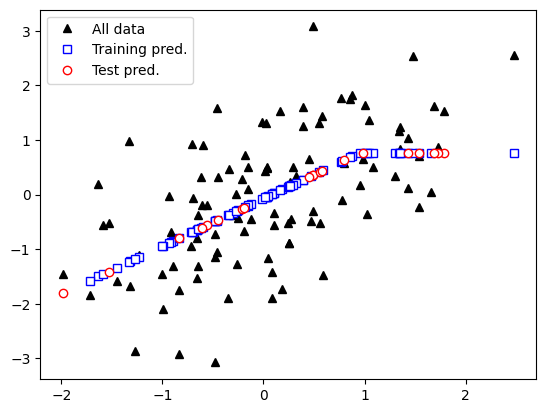

In [17]:
predYtrain=ANNreg(X_train).detach().numpy()
plt.plot(x,y,'k^',label='All data')
plt.plot(X_train,predYtrain,'bs',markerfacecolor='w',label='Training pred.')
plt.plot(X_test,predYtest.detach(),'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()